<a href="https://colab.research.google.com/github/TaeYo-on/NLP/blob/main/nlp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))


총 샘플의 수 : 5572


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1']=data['v1'].replace(['ham', 'spam'], [0,1])
data[:5]

<ipython-input-3-c928434418eb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['v1']=data['v1'].replace(['ham', 'spam'], [0,1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
data.drop_duplicates(subset=['v2'], inplace=True)
len(data)

5169

<Axes: xlabel='v1'>

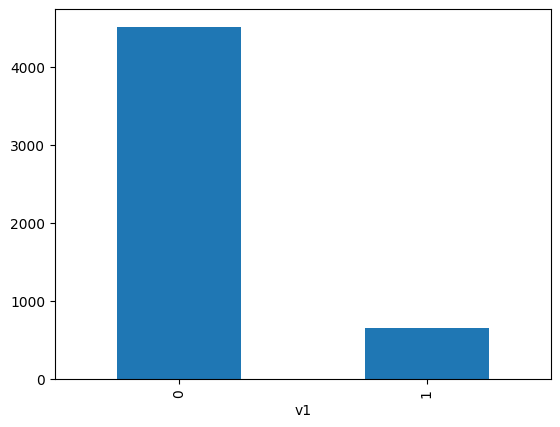

In [ ]:
data['v1'].value_counts().plot(kind='bar')

In [ ]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [ ]:
round(data['v1'].value_counts()[0]/len(data)*100,3)
round(data['v1'].value_counts()[1]/len(data)*100,3)

12.633

In [ ]:
X_data=data['v2']
y_data=data['v1']
len(X_data), len(y_data)

(5169, 5169)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_data, y_data, random_state=0, test_size=0.2, stratify=y_data)


In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded=tokenizer.texts_to_sequences(X_train)
X_train_encoded[:5]

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407]]

In [ ]:
word_to_index=tokenizer.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [ ]:
threshold=2
total_cnt=len(word_to_index)
rare_cnt=0
total_freq=0
rare_freq=0

for key,value in tokenizer.word_counts.items():
  total_freq+=value
  if value<threshold:
    rare_cnt+=1
    rare_freq+=value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4337
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.45326684567191
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.65745644331875


In [ ]:
vocab_size=len(word_to_index)+1
vocab_size

7822

In [ ]:
max(len(sample) for sample in X_train_encoded)

189

In [ ]:
sum(map(len, X_train_encoded))/len(X_train_encoded)

15.75453446191052

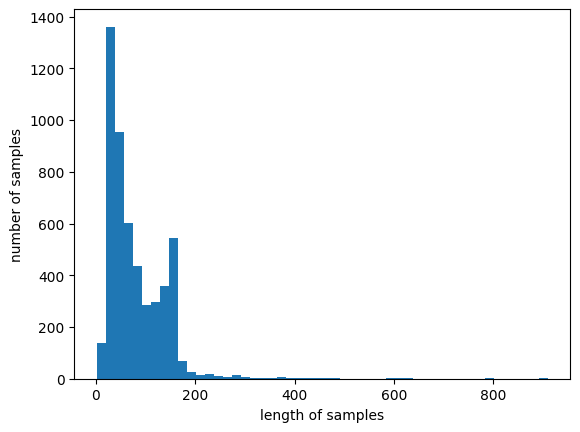

In [ ]:
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len=189
X_train_padded=pad_sequences(X_train_encoded, maxlen=max_len)
X_train_padded.shape

(4135, 189)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential

embedding_dim=32
hidden_units=32

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history=model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - acc: 0.8685 - loss: 0.4288 - val_acc: 0.9613 - val_loss: 0.1960
Epoch 2/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.9737 - loss: 0.1249 - val_acc: 0.9758 - val_loss: 0.0912
Epoch 3/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.9852 - loss: 0.0584 - val_acc: 0.9770 - val_loss: 0.0801
Epoch 4/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - acc: 0.9925 - loss: 0.0331 - val_acc: 0.9782 - val_loss: 0.0793


In [ ]:
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_padded=pad_sequences(X_test_encoded, maxlen=max_len)
model.evaluate(X_test_padded, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9845 - loss: 0.0665


[0.07145322114229202, 0.9796905517578125]

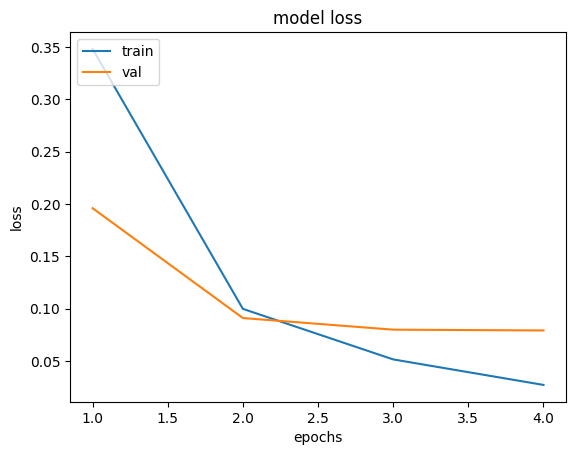

In [ ]:
epochs=range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 32
dropout_ratio = 0.3
num_filters = 32
kernel_size = 5

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.keras', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history=model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.8619 - loss: 0.4736
Epoch 1: val_acc improved from -inf to 0.87787, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - acc: 0.8621 - loss: 0.4723 - val_acc: 0.8779 - val_loss: 0.3995
Epoch 2/10
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.8759 - loss: 0.3686
Epoch 2: val_acc did not improve from 0.87787
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.8758 - loss: 0.3684 - val_acc: 0.8779 - val_loss: 0.3793
Epoch 3/10
50/52 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.8726 - loss: 0.3242
Epoch 3: val_acc improved from 0.87787 to 0.96372, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.8730 - loss: 0.3225 - val_acc: 0.9637 - val_loss: 0.2892
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.9170 - loss: 0.2050
Epoch 4: val_acc improved from 0.96372 to 0.96977, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9173 - loss: 0.204

In [ ]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9799 - loss: 0.0746

 테스트 정확도: 0.9807


fatal: not a git repository (or any of the parent directories): .git


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))


총 샘플의 수 : 5572


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1']=data['v1'].replace(['ham', 'spam'], [0,1])
data[:5]

<ipython-input-3-c928434418eb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['v1']=data['v1'].replace(['ham', 'spam'], [0,1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
data.drop_duplicates(subset=['v2'], inplace=True)
len(data)

5169

<Axes: xlabel='v1'>

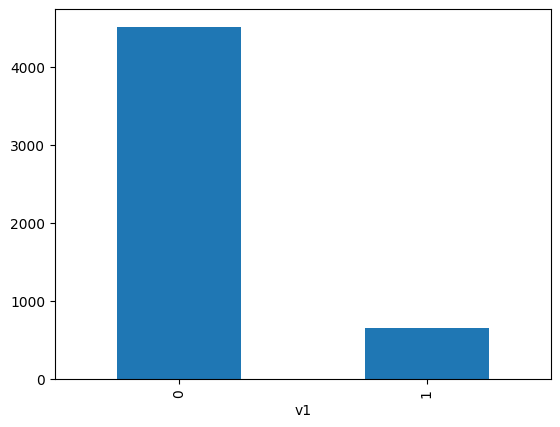

In [ ]:
data['v1'].value_counts().plot(kind='bar')

In [ ]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [ ]:
round(data['v1'].value_counts()[0]/len(data)*100,3)
round(data['v1'].value_counts()[1]/len(data)*100,3)

12.633

In [ ]:
X_data=data['v2']
y_data=data['v1']
len(X_data), len(y_data)

(5169, 5169)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_data, y_data, random_state=0, test_size=0.2, stratify=y_data)


In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded=tokenizer.texts_to_sequences(X_train)
X_train_encoded[:5]

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407]]

In [ ]:
word_to_index=tokenizer.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [ ]:
threshold=2
total_cnt=len(word_to_index)
rare_cnt=0
total_freq=0
rare_freq=0

for key,value in tokenizer.word_counts.items():
  total_freq+=value
  if value<threshold:
    rare_cnt+=1
    rare_freq+=value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4337
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.45326684567191
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.65745644331875


In [ ]:
vocab_size=len(word_to_index)+1
vocab_size

7822

In [ ]:
max(len(sample) for sample in X_train_encoded)

189

In [ ]:
sum(map(len, X_train_encoded))/len(X_train_encoded)

15.75453446191052

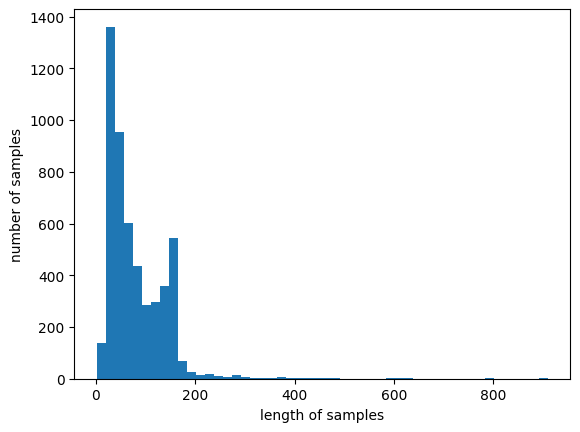

In [ ]:
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len=189
X_train_padded=pad_sequences(X_train_encoded, maxlen=max_len)
X_train_padded.shape

(4135, 189)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential

embedding_dim=32
hidden_units=32

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history=model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - acc: 0.8685 - loss: 0.4288 - val_acc: 0.9613 - val_loss: 0.1960
Epoch 2/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.9737 - loss: 0.1249 - val_acc: 0.9758 - val_loss: 0.0912
Epoch 3/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.9852 - loss: 0.0584 - val_acc: 0.9770 - val_loss: 0.0801
Epoch 4/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - acc: 0.9925 - loss: 0.0331 - val_acc: 0.9782 - val_loss: 0.0793


In [ ]:
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_padded=pad_sequences(X_test_encoded, maxlen=max_len)
model.evaluate(X_test_padded, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9845 - loss: 0.0665


[0.07145322114229202, 0.9796905517578125]

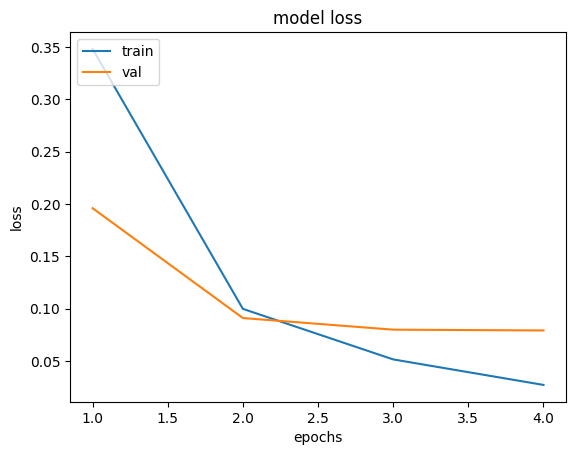

In [ ]:
epochs=range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 32
dropout_ratio = 0.3
num_filters = 32
kernel_size = 5

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.keras', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history=model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.8619 - loss: 0.4736
Epoch 1: val_acc improved from -inf to 0.87787, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - acc: 0.8621 - loss: 0.4723 - val_acc: 0.8779 - val_loss: 0.3995
Epoch 2/10
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.8759 - loss: 0.3686
Epoch 2: val_acc did not improve from 0.87787
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.8758 - loss: 0.3684 - val_acc: 0.8779 - val_loss: 0.3793
Epoch 3/10
50/52 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.8726 - loss: 0.3242
Epoch 3: val_acc improved from 0.87787 to 0.96372, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.8730 - loss: 0.3225 - val_acc: 0.9637 - val_loss: 0.2892
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.9170 - loss: 0.2050
Epoch 4: val_acc improved from 0.96372 to 0.96977, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9173 - loss: 0.204

In [ ]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9799 - loss: 0.0746

 테스트 정확도: 0.9807


Cloning into 'nlp'...


fatal: not a git repository (or any of the parent directories): .git


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))


총 샘플의 수 : 5572


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1']=data['v1'].replace(['ham', 'spam'], [0,1])
data[:5]

<ipython-input-3-c928434418eb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['v1']=data['v1'].replace(['ham', 'spam'], [0,1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
data.drop_duplicates(subset=['v2'], inplace=True)
len(data)

5169

<Axes: xlabel='v1'>

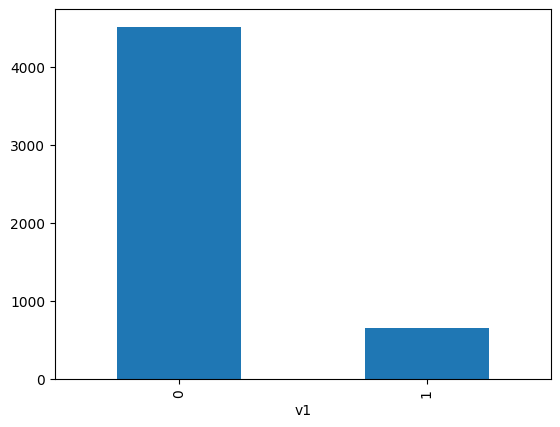

In [ ]:
data['v1'].value_counts().plot(kind='bar')

In [ ]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [ ]:
round(data['v1'].value_counts()[0]/len(data)*100,3)
round(data['v1'].value_counts()[1]/len(data)*100,3)

12.633

In [ ]:
X_data=data['v2']
y_data=data['v1']
len(X_data), len(y_data)

(5169, 5169)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_data, y_data, random_state=0, test_size=0.2, stratify=y_data)


In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded=tokenizer.texts_to_sequences(X_train)
X_train_encoded[:5]

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407]]

In [ ]:
word_to_index=tokenizer.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [ ]:
threshold=2
total_cnt=len(word_to_index)
rare_cnt=0
total_freq=0
rare_freq=0

for key,value in tokenizer.word_counts.items():
  total_freq+=value
  if value<threshold:
    rare_cnt+=1
    rare_freq+=value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4337
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.45326684567191
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.65745644331875


In [ ]:
vocab_size=len(word_to_index)+1
vocab_size

7822

In [ ]:
max(len(sample) for sample in X_train_encoded)

189

In [ ]:
sum(map(len, X_train_encoded))/len(X_train_encoded)

15.75453446191052

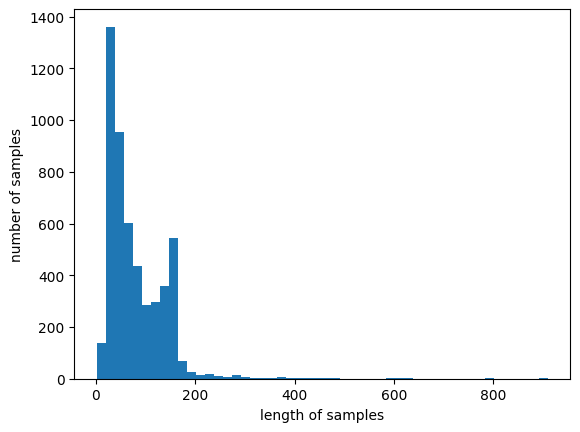

In [ ]:
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len=189
X_train_padded=pad_sequences(X_train_encoded, maxlen=max_len)
X_train_padded.shape

(4135, 189)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential

embedding_dim=32
hidden_units=32

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history=model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - acc: 0.8685 - loss: 0.4288 - val_acc: 0.9613 - val_loss: 0.1960
Epoch 2/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.9737 - loss: 0.1249 - val_acc: 0.9758 - val_loss: 0.0912
Epoch 3/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.9852 - loss: 0.0584 - val_acc: 0.9770 - val_loss: 0.0801
Epoch 4/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - acc: 0.9925 - loss: 0.0331 - val_acc: 0.9782 - val_loss: 0.0793


In [ ]:
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_padded=pad_sequences(X_test_encoded, maxlen=max_len)
model.evaluate(X_test_padded, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9845 - loss: 0.0665


[0.07145322114229202, 0.9796905517578125]

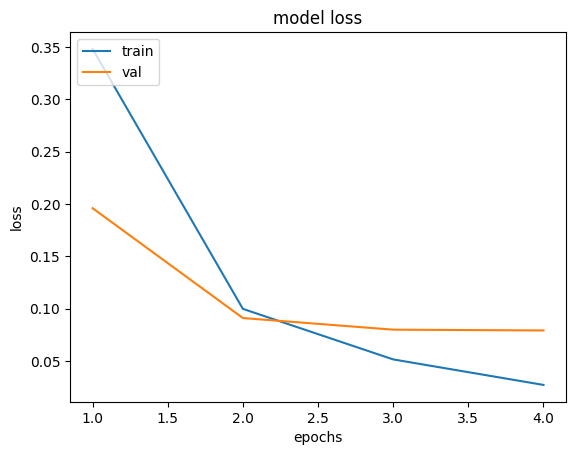

In [ ]:
epochs=range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 32
dropout_ratio = 0.3
num_filters = 32
kernel_size = 5

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.keras', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history=model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.8619 - loss: 0.4736
Epoch 1: val_acc improved from -inf to 0.87787, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - acc: 0.8621 - loss: 0.4723 - val_acc: 0.8779 - val_loss: 0.3995
Epoch 2/10
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.8759 - loss: 0.3686
Epoch 2: val_acc did not improve from 0.87787
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.8758 - loss: 0.3684 - val_acc: 0.8779 - val_loss: 0.3793
Epoch 3/10
50/52 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.8726 - loss: 0.3242
Epoch 3: val_acc improved from 0.87787 to 0.96372, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.8730 - loss: 0.3225 - val_acc: 0.9637 - val_loss: 0.2892
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.9170 - loss: 0.2050
Epoch 4: val_acc improved from 0.96372 to 0.96977, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9173 - loss: 0.204

In [ ]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9799 - loss: 0.0746

 테스트 정확도: 0.9807
